<a href="https://colab.research.google.com/github/Arzoo-thind/Plant-Disease-Detection-AI-Model/blob/main/new_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown

# Replace 'your_file_id_here' with the actual file ID from Google Drive
file_id = "12xg6cjtuyYl2n1K_WWiOuQpTIDLCke6x"
output = "output.zip"  # Specify the output file name

# Construct the Google Drive URL
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url, output, quiet=False)

print(f"File downloaded and saved to: {output}")

# Unzip the dataset
!unzip -q output.zip

!ls dataset plant disease


Downloading...
From (original): https://drive.google.com/uc?id=12xg6cjtuyYl2n1K_WWiOuQpTIDLCke6x
From (redirected): https://drive.google.com/uc?id=12xg6cjtuyYl2n1K_WWiOuQpTIDLCke6x&confirm=t&uuid=8d6bf9e6-1889-4e9f-a329-58cf82e76684
To: /content/output.zip
100%|██████████| 2.90G/2.90G [00:40<00:00, 71.9MB/s]


File downloaded and saved to: output.zip
ls: cannot access 'dataset': No such file or directory
ls: cannot access 'plant': No such file or directory
ls: cannot access 'disease': No such file or directory


In [ ]:
import os
# Corrected dataset path based on the output of the unzip command
base_dataset_path = "New Plant Diseases Dataset(Augmented)"
dataset_path = os.path.join(base_dataset_path, "New Plant Diseases Dataset(Augmented)")


# List the contents of the dataset directory to find the correct folder names
print("Contents of dataset directory:")
!ls "{dataset_path}"

# Corrected paths for train and valid directories - accounting for the nested directory
train_data_dir = os.path.join(dataset_path, "train")
valid_data_dir = os.path.join(dataset_path, "valid")

# List the contents of the training directory to see the class folders and define 'classes'
try:
    classes = os.listdir(train_data_dir)
    print("\nTraining classes:", classes)
    print(f"Number of training classes: {len(classes)}")

    # List the contents of the validation directory
    print("Validation classes:", os.listdir(valid_data_dir))
    print(f"Number of validation classes: {len(os.listdir(valid_data_dir))}")


    # Count images per class in the training directory
    print("\nImage counts per class (Training):")
    for class_name in classes:
        class_path = os.path.join(train_data_dir, class_name)
        print(f"{class_name}: {len(os.listdir(class_path))} images")

except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure the dataset path and directory names are correct.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")




Contents of dataset directory:
train  valid

Training classes: ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Peach___Bacterial_spot', 'Squash___Powdery_mildew', 'Raspberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Early_blight', 'Cherry_(including_sour)___healthy', 'Apple___Black_rot', 'Tomato___Target_Spot', 'Grape___healthy', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Peach___healthy', 'Apple___Cedar_apple_rust', 'Pepper,_bell___healthy', 'Potato___healthy', 'Potato___Early_blight', 'Strawberry___healthy', 'Tomato___Leaf_Mold', 'Pepper,_bell___Bacterial_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Corn_(maize)___Common_rust_', 'Tomato___Tomato_mosaic_virus', 'Apple___Apple_scab', 'Apple___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Soybean___healthy', 'Grape___Esca_(Black_Measles)', 'Blueberry___healthy', 'Tomato___

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Data generators
data_gen = ImageDataGenerator(
    rescale=1.0/255,        # Normalize pixel values
    rotation_range=20,              # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,          # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,         # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,                # Apply random shearing transformations
    zoom_range=0.2,                 # Randomly zoom in on images
    horizontal_flip=True,           # Randomly flip images horizontally
    fill_mode='nearest',            # Strategy for filling in new pixels created by transformations
    validation_split=0.1            # Reserve 10% for validation
)

# Training generator with a fixed seed
train_generator = data_gen.flow_from_directory(
    train_data_dir,  # Use the correct training data directory
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=64,
    class_mode='categorical',
    subset='training',       # Training split
    seed=SEED                # Fixed seed for reproducibility
)

# Validation generator with the same seed
val_generator = data_gen.flow_from_directory(
    valid_data_dir,  # Use the correct validation data directory
    target_size=(128, 128),
    batch_size=64,
    class_mode='categorical',
    subset='validation',     # Validation split
    seed=SEED                # Fixed seed for reproducibility
)

Found 63282 images belonging to 38 classes.
Found 1742 images belonging to 38 classes.


indices: [ 482 1507  950 1005  705  275  438 1312 1140  613]


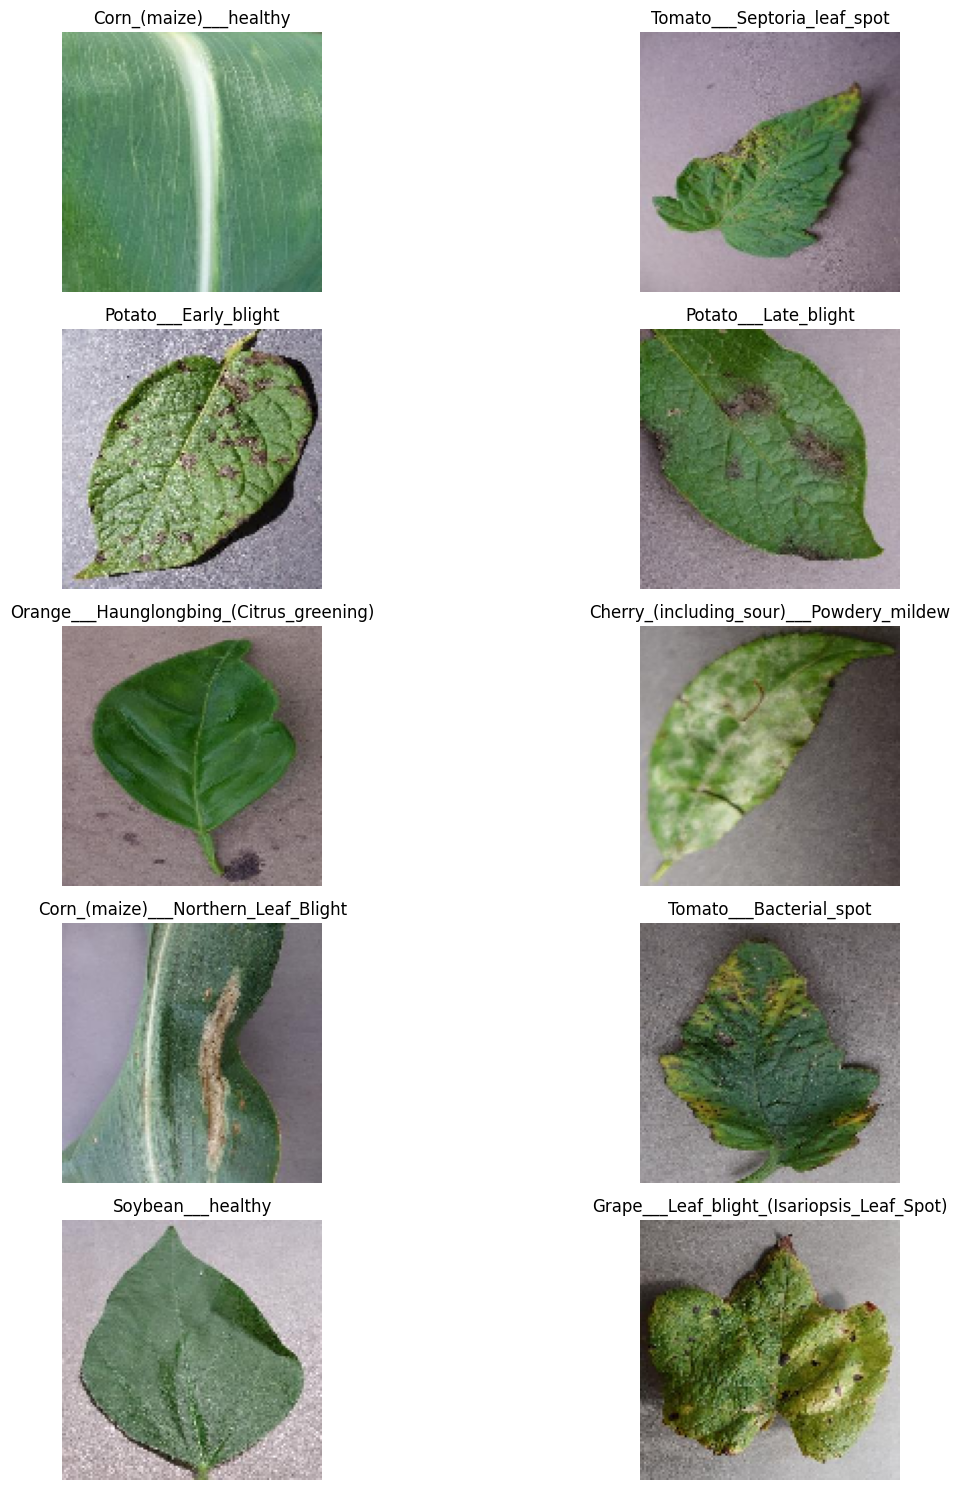

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def visualize_validation_images(val_generator, num_images=10):
    """
    Display a subset of images from the validation set.

    Args:
        val_generator: The validation data generator.
        num_images: Number of images to display.
    """
    # Get random indices for the validation images
    indices = np.random.choice(range(len(val_generator.filepaths)), num_images, replace=False)
    print('indices:', indices)

    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(indices):
        # Get the image path and true label
        image_path = val_generator.filepaths[idx]
        true_label = list(val_generator.class_indices.keys())[val_generator.classes[idx]]


        # Load and preprocess the image
        img = load_img(image_path, target_size=(128, 128))  # Resize image for display
        img_array = img_to_array(img) / 255.0              # Normalize pixel values

        # Display the image
        plt.subplot(5, 2, i + 1)
        plt.imshow(img_array)
        plt.axis("off")
        plt.title(f"{true_label}")

    plt.tight_layout()
    plt.show()

# Call the function to visualize validation images
visualize_validation_images(val_generator, num_images=10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Number of classes
num_classes = len(train_generator.class_indices)

model_plant = Sequential([
    Conv2D(64, (4, 4), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer
])

model_plant.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_plant.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 125, 125, 64)   │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,843,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,871,494 (7.14 MB)

 Trainable params: 1,871,494 (7.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import EarlyStopping

# Add this callback when fitting the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# In your model.fit() method, you would pass this as a callback
# model.fit(..., callbacks=[early_stopping])

history = model_plant.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
989/989 ━━━━━━━━━━━━━━━━━━━━ 314s 311ms/step - accuracy: 0.1322 - loss: 3.1642 - val_accuracy: 0.4598 - val_loss: 1.8645
Epoch 2/15
989/989 ━━━━━━━━━━━━━━━━━━━━ 303s 306ms/step - accuracy: 0.4588 - loss: 1.7917 - val_accuracy: 0.6246 - val_loss: 1.2018
Epoch 3/15
989/989 ━━━━━━━━━━━━━━━━━━━━ 301s 305ms/step - accuracy: 0.6009 - loss: 1.2984 - val_accuracy: 0.6998 - val_loss: 0.9755
Epoch 4/15
989/989 ━━━━━━━━━━━━━━━━━━━━ 303s 306ms/step - accuracy: 0.6661 - loss: 1.0722 - val_accuracy: 0.7480 - val_loss: 0.8195
Epoch 5/15
989/989 ━━━━━━━━━━━━━━━━━━━━ 293s 297ms/step - accuracy: 0.7124 - loss: 0.9119 - val_accuracy: 0.7807 - val_loss: 0.6736
Epoch 6/15
989/989 ━━━━━━━━━━━━━━━━━━━━ 290s 294ms/step - accuracy: 0.7417 - loss: 0.8141 - val_accuracy: 0.7956 - val_loss: 0.6088
Epoch 7/15
989/989 ━━━━━━━━━━━━━━━━━━━━ 289s 292ms/step - accuracy: 0.7674 - loss: 0.7391 - val_accuracy: 0.8123 - val_loss: 0.5825
Epoch 8/15
989/989 ━━━━━━━━━━━━━━━━━━━━ 292s 296ms/step - accuracy: 0.7856 -

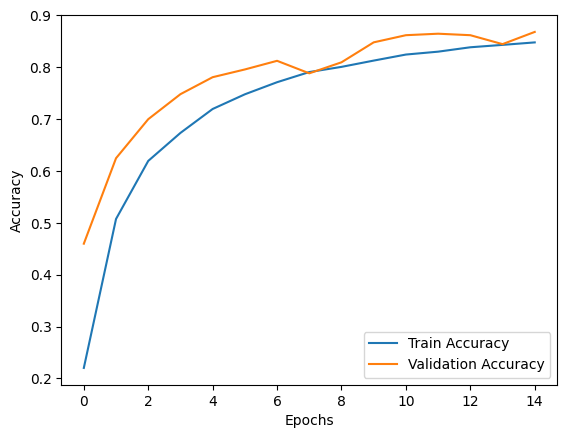

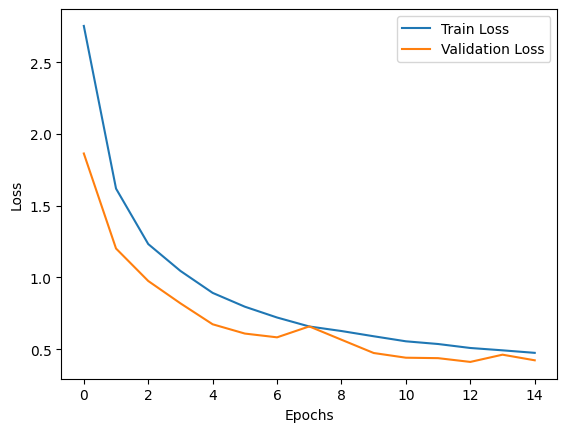

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
loss, accuracy = model_plant.evaluate(val_generator)
print(f"Accuracy: {accuracy * 100:.2f}%")

28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 0.8777 - loss: 0.3830
Accuracy: 87.03%


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import random

def predict_and_visualize_random(val_generator, model, num_images=10):
    """
    Predict and visualize the results for randomly selected validation images.

    Args:
        val_generator: The validation generator.
        model: Trained CNN model.
        num_images: Number of random images to test.
    """
    # Randomly select indices for validation images
    random_indices = random.sample(range(len(val_generator.filepaths)), num_images)
    print(random_indices)

    plt.figure(figsize=(15, 15))
    for i, idx in enumerate(random_indices):
        # Get the image path and true label
        image_path = val_generator.filepaths[idx]
        true_label = list(val_generator.class_indices.keys())[val_generator.classes[idx]]

        # Load and preprocess the image
        img = load_img(image_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = list(val_generator.class_indices.keys())[np.argmax(predictions[0])]

        # Plot the image with prediction and true label
        plt.subplot(5, 2, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"\n {true_label}\n AI: {predicted_class}")
        #print('*'*50)

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


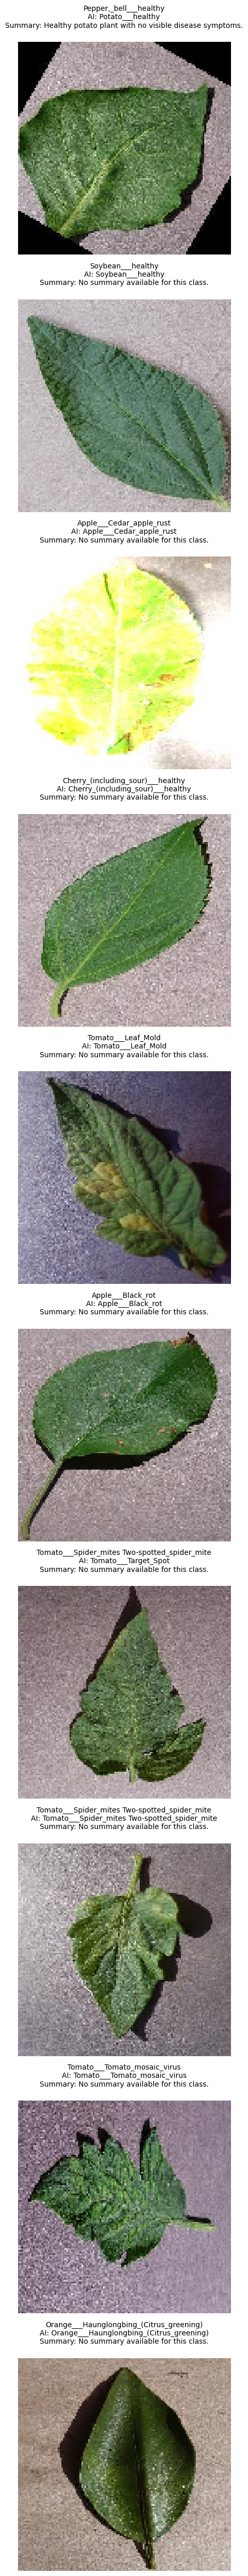

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import random

# Dummy summary function (replace with actual class summaries)
def get_summary(predicted_class):
    summaries = {
        "Pepper__bell___Bacterial_spot": "Bacterial disease caused by Xanthomonas. Symptoms include water-soaked lesions.",
        "Pepper__bell___healthy": "Healthy bell pepper plant with no visible signs of disease or stress.",
        "Potato___Early_blight": "Fungal disease caused by Alternaria solani. Leads to dark concentric spots.",
        "Potato___Late_blight": "Serious fungal disease caused by Phytophthora infestans. Causes water-soaked lesions.",
        "Potato___healthy": "Healthy potato plant with no visible disease symptoms.",
        "Tomato_Bacterial_spot": "Bacterial disease caused by Xanthomonas. Black, water-soaked spots on leaves and fruits.",
        "Tomato_Early_blight": "Fungal disease causing irregular brown spots and leaf blight.",
        "Tomato_Late_blight": "Caused by Phytophthora infestans. Symptoms include gray-green water-soaked lesions.",
        "Tomato_Leaf_Mold": "Fungal disease causing yellow spots and mold growth on the undersides of leaves.",
        "Tomato_Septoria_leaf_spot": "Fungal disease causing circular spots with gray centers and dark margins.",
        "Tomato_Spider_mites_Two_spotted_spider_mite": "Damage by Tetranychus urticae mites. Symptoms include yellow stippling and webbing.",
        "Tomato__Target_Spot": "Fungal disease causing brown spots with concentric rings on leaves and fruits.",
        "Tomato__Tomato_YellowLeaf__Curl_Virus": "Viral disease causing leaf curling, yellowing, and stunted growth.",
        "Tomato__Tomato_mosaic_virus": "Viral disease causing mottled patterns on leaves. Transmitted by contact or infected seeds.",
        "Tomato_healthy": "Healthy tomato plant with no visible disease symptoms or stress."
    }
    return summaries.get(predicted_class, "No summary available for this class.")

def predict_and_visualize_one_per_line(val_generator, model, num_images=10):
    """
    Predict and visualize validation images, displaying one image per line with title and summary.

    Args:
        val_generator: Validation generator.
        model: Trained CNN model.
        num_images: Number of random images to visualize.
    """
    # Randomly select indices for validation images
    random_indices = random.sample(range(len(val_generator.filepaths)), num_images)

    plt.figure(figsize=(10, num_images * 5))  # Adjust figure height based on number of images
    for i, idx in enumerate(random_indices):
        # Get the image path and true label
        image_path = val_generator.filepaths[idx]
        true_label = list(val_generator.class_indices.keys())[val_generator.classes[idx]]

        # Load and preprocess the image
        img = load_img(image_path, target_size=(128, 128))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class
        predictions = model.predict(img_array)
        predicted_class = list(val_generator.class_indices.keys())[np.argmax(predictions[0])]

        # Get the disease summary
        summary = get_summary(predicted_class)

        # Plot the image
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"{true_label}\nAI: {predicted_class}\nSummary: {summary}",
                  fontsize=10, pad=20)

    plt.tight_layout()
    plt.show()

# Call the function
predict_and_visualize_one_per_line(val_generator, model_plant, num_images=10)

In [ ]:
import os
dataset_path = "test"
print("Contents of dataset directory:")

Contents of dataset directory:


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1. Define the parameters for your generator ---
# Path to your directory containing the test images
test_directory = "New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"

# The size of the images that your model expects
# This should match the input shape of your trained model
image_size = (128, 128) # Corrected image size based on model input shape

# The number of images to load at a time
batch_size = 32

# --- 2. Create the ImageDataGenerator for the test set ---
# For the test set, we only need to normalize the pixel values.
# No data augmentation (like rotation or flipping) should be applied here.
test_datagen = ImageDataGenerator(rescale=1./255)

# --- 3. Use .flow_from_directory() to create the generator ---
# This method reads images from the directory and creates a data generator.
test_generator = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size=image_size,
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical', # Use 'categorical' for multi-class classification
    shuffle=False             # *IMPORTANT:* Set to False for test data
)

# 4. Print information to verify the generator is working ---
print(f"Found {test_generator.n} images belonging to {test_generator.num_classes} classes.")
print(f"Class indices: {test_generator.class_indices}")

# You can also get the true labels directly from the generator
true_labels = test_generator.classes

print(f"First 10 true labels: {true_labels[:10]}")

Found 17572 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Class indices: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___health

In [ ]:
def calculate_recall(true_labels, predicted_labels):
    """
    Calculates recall manually.
    """
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Input arrays must have the same length.")

    true_positives = 0
    false_negatives = 0

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        # A positive actual sample is when true_label == 1
        if true_label == 1:
            # A true positive is a correct positive prediction
            if predicted_label == 1:
                true_positives += 1
            # A false negative is an incorrect negative prediction
            else:
                false_negatives += 1

    if (true_positives + false_negatives) == 0:
        return 0.0

    recall = true_positives / (true_positives + false_negatives)
    return recall


In [ ]:
pip install scikit-learn

In [ ]:
def calculate_precision(true_labels, predicted_labels):
    """
    Calculates precision manually.

    Args:
        true_labels (list or np.array): The ground truth labels.
        predicted_labels (list or np.array): The model's predicted labels.

    Returns:
        float: The precision score.
    """
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Input arrays must have the same length.")

    true_positives = 0
    false_positives = 0

    for true_label, predicted_label in zip(true_labels, predicted_labels):
        # A positive prediction is when predicted_label == 1
        if predicted_label == 1:
            # A true positive is a correct positive prediction
            if true_label == 1:
                true_positives += 1
            # A false positive is an incorrect positive prediction
            else:
                false_positives += 1

    # Avoid division by zero
    if (true_positives + false_positives) == 0:
        return 0.0

    precision = true_positives / (true_positives + false_positives)
    return precision

In [ ]:
# Get the true labels from the test generator
true_labels = test_generator.classes

# Get the predicted labels from the model
predictions = model_plant.predict(test_generator)
predicted_labels = test_generator.classes

# Calculate precision using the manual function
precision_manual = calculate_precision(true_labels, predicted_labels)
print(f"The manually calculated precision is: {precision_manual:.2f}")

In [ ]:
def calculate_f1_score(precision_manual, recall_manual):
    """
    Calculates F1-score manually.
    """
    if (precision_manual + recall_manual) == 0:
        return 0.0

    f1 = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)
    return f1

# Calculate recall manually
recall_manual = calculate_recall(true_labels, predicted_labels)
print(f"The manually calculated recall is: {recall_manual:.2f}")

# Calculate F1-score using the manual function
f1_manual = calculate_f1_score(precision_manual, recall_manual)
print(f"The manually calculated F1-score is: {f1_manual:.2f}")

550/550 ━━━━━━━━━━━━━━━━━━━━ 17s 31ms/step


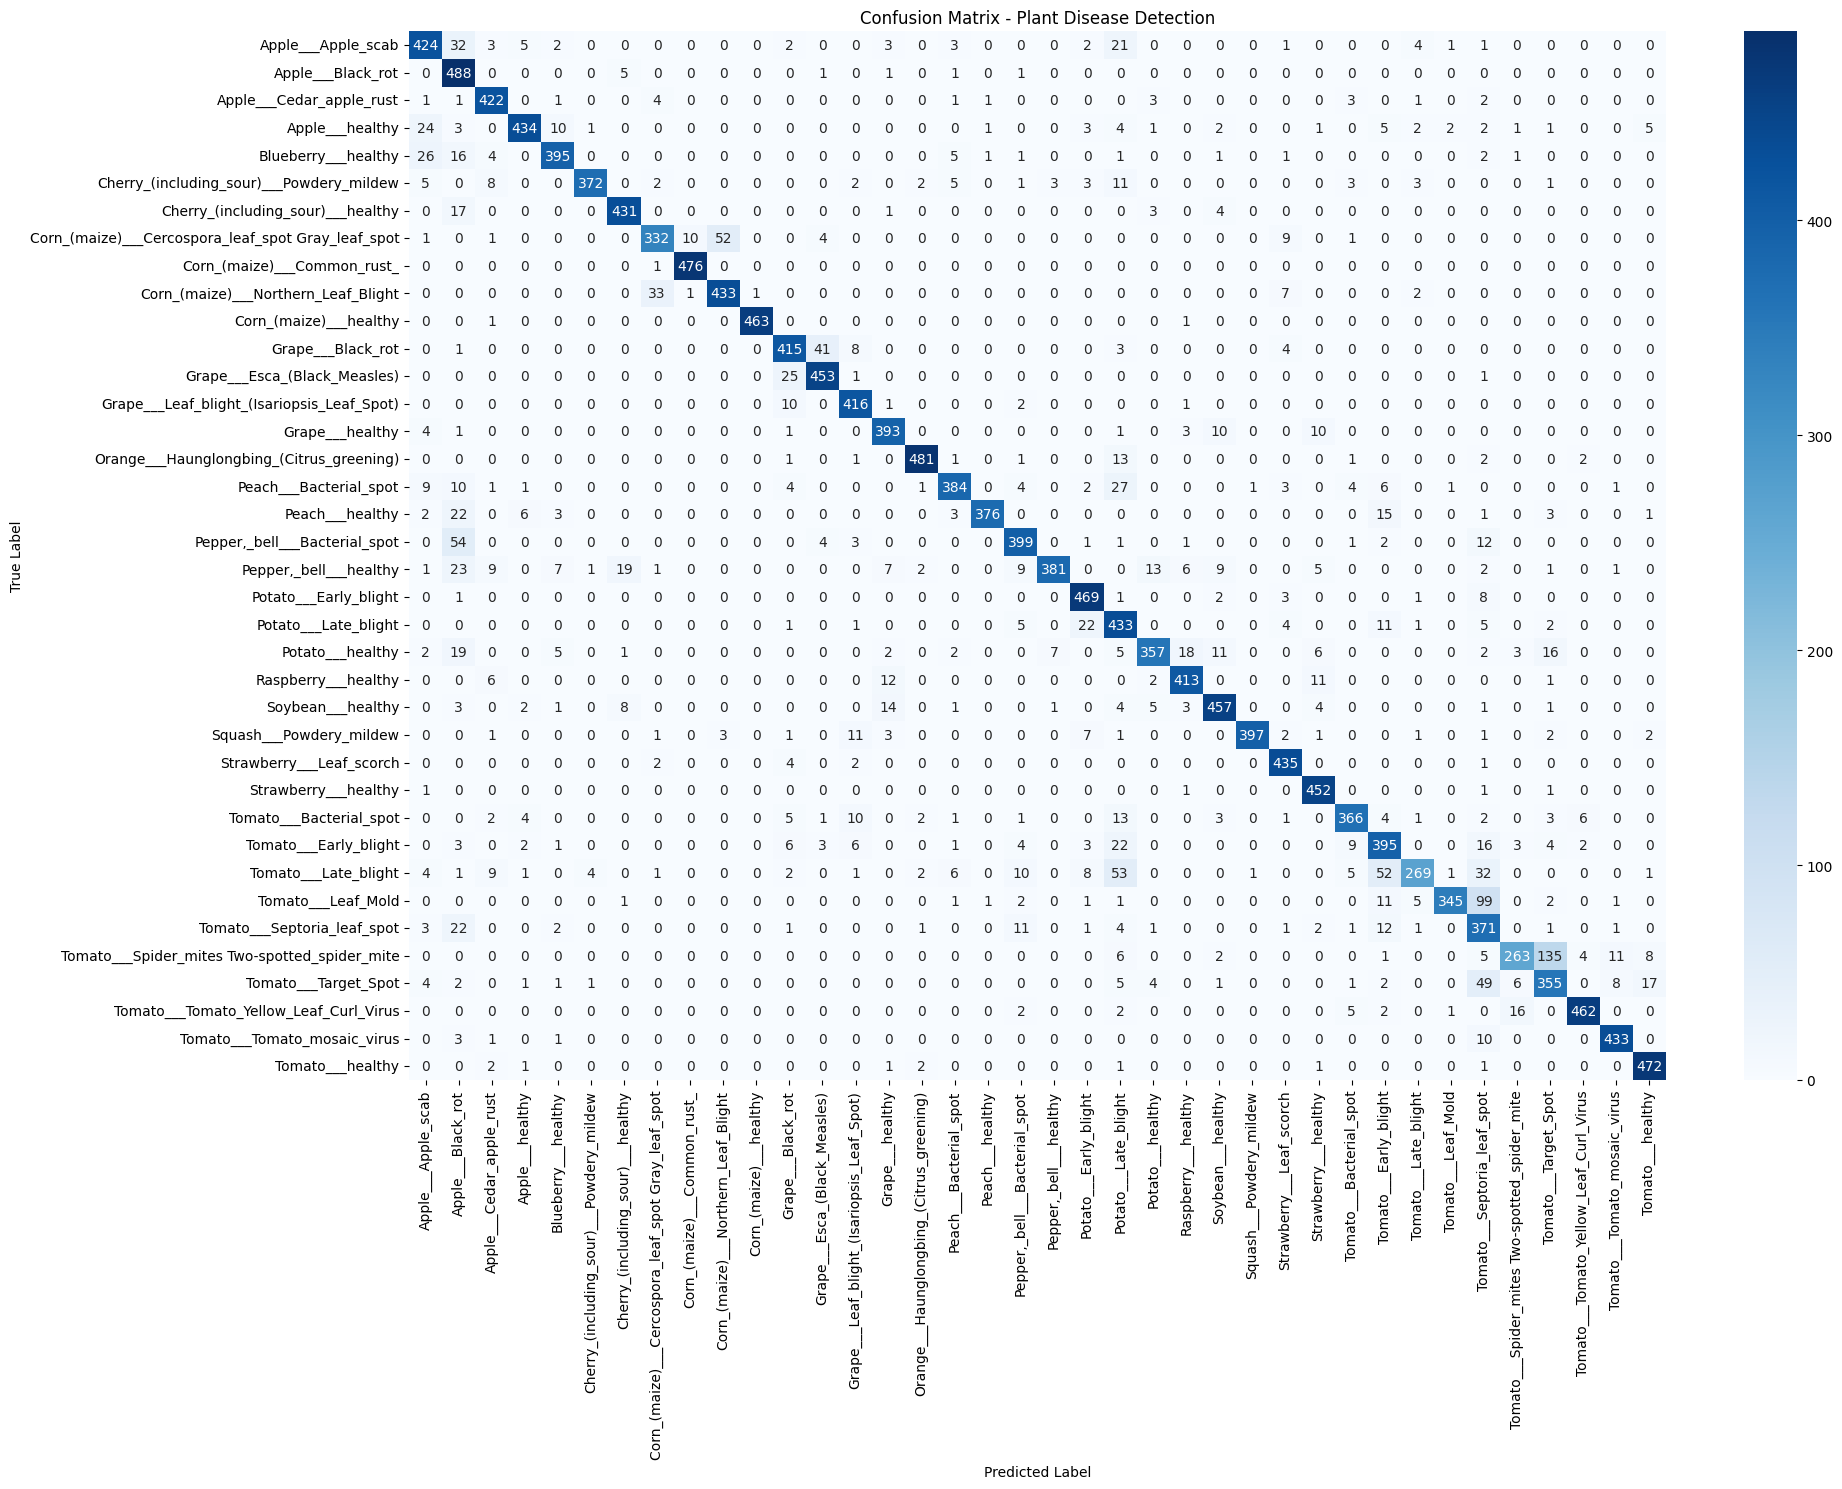

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Get the true labels from the test generator
y_true = test_generator.classes

# Get the predicted labels from the model
predictions = model_plant.predict(test_generator)
# Convert predictions from probabilities to class labels
y_pred = np.argmax(predictions, axis=1)

# Get the class names from the test generator
class_names = list(test_generator.class_indices.keys())

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Normalize (optional)
# cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot
plt.figure(figsize=(20, 15)) # Increased figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Plant Disease Detection")
plt.tight_layout()

# Save figure
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image from a file
image_path = 'your_image.jpg' # Replace with the path to your image
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print(f"Error: Could not read the image from {image_path}")
else:
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display the original and grayscale images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Display original image
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Display grayscale image
    axes[1].imshow(gray_image, cmap='gray')
    axes[1].set_title('Grayscale Image')
    axes[1].axis('off')

    plt.show()